
# Atlas notebooks
--------------
----------
## Calculation and hatching of the uncertainty in projected delta changes.

*08/07/2021*

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

> This notebook is a simple example of uncertainty visualization in projected delta changes. Example data available at [auxiliary-material](https://github.com/IPCC-WG1/Atlas/tree/master/notebooks/auxiliary-material) is used. The advanced method for the uncertainty visualization of the Atlas Chapter and the Interactive Atlas is included in [04_map_figures.R](https://github.com/IPCC-WG1/Atlas/tree/master/datasets-interactive-atlas/04_map_figures.R). Additionally, the base hatching R-functions are defined in [hatching-functions.R](https://github.com/IPCC-WG1/Atlas/tree/master/datasets-interactive-atlas/hatching-functions/hatching-functions.R)

> This and other notebooks are available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purpose. In particular, [load-remote-data_R.ipynb](https://github.com/IPCC-WG1/Atlas/tree/master/notebooks/load-remote-data_R.ipynb) describes the generation of the example data used in this notebook.


### 1. Load libraries, functions and data

**Libraries**:

In [43]:
# Climate4R package for data loading
library(loadeR)
# Climate4R package for data visualization
# <https://doi.org/10.1016/j.envsoft.2017.09.008>
library(visualizeR)

**Functions**: The base hatching R-functions are defined in [hatching-functions.R](https://github.com/IPCC-WG1/Atlas/tree/master/datasets-interactive-atlas/hatching-functions/hatching-functions.R). Here we will only use the  `agreement` function, which is the simplest measure of uncertainty of the Atlas. To load the function in the working environment use the `source` R base function as follows.

In [44]:
# Load functions for computing uncertainty (signal, signal.ens and agreement)
source("../datasets-interactive-atlas/hatching-functions/hatching-functions.R")

**data**: The data used in this example is available under the [auxiliary-material](https://github.com/IPCC-WG1/Atlas/tree/master/notebooks/auxiliary-material) folder. They are two NetCDFs containing historical and rcp85 CMIP5 precipitation climatologies for the 1986-2005 and 2041-2060 periods respectively and for a reduced set of models. The [*load-remote-data_R.ipynb*](https://github.com/IPCC-WG1/Atlas/tree/master/notebooks/load-remote-data_R.ipynb) notebook shows how they were generated.

You can use `dataInventory` to check data information:

In [55]:
dataInventory("auxiliary-material/CMIP5_historical_pr.nc")

[2021-07-09 10:55:15] Doing inventory ...

[2021-07-09 10:55:15] Retrieving info for 'pr' (0 vars remaining)

[2021-07-09 10:55:16] Done.



$pr
$pr$Description
[1] "Precipitation"

$pr$DataType
[1] "float"

$pr$Shape
[1]  1  6 21 23

$pr$Units
[1] "mm"

$pr$DataSizeMb
[1] 0.011592

$pr$Version
[1] NA

$pr$Dimensions
$pr$Dimensions$member
$pr$Dimensions$member$Type
[1] "Ensemble"

$pr$Dimensions$member$Units
[1] ""

$pr$Dimensions$member$Values
[1] "Member_1" "Member_2" "Member_3" "Member_4" "Member_5" "Member_6"


$pr$Dimensions$time
$pr$Dimensions$time$Type
[1] "Time"

$pr$Dimensions$time$TimeStep
[1] ".0 days"

$pr$Dimensions$time$Units
[1] "days since 1985-12-01 12:00:00 GMT"

$pr$Dimensions$time$Date_range
[1] "1985-12-01T12:00:00Z - 1985-12-01T12:00:00Z"


$pr$Dimensions$lat
$pr$Dimensions$lat$Type
[1] "Lat"

$pr$Dimensions$lat$Units
[1] "degrees_north"

$pr$Dimensions$lat$Values
 [1] 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75

$pr$Dimensions$lat$Shape
[1] 21

$pr$Dimensions$lat$Coordinates
[1] "lat"


$pr$Dimensions$lon
$pr$Dimensions$lon$Type
[1] "Lon"

$pr$Dimensions$lon$Units
[1] "degrees_east"

$pr$Dimensions$lon$Values
 [1] -9 -7 -5 -3 -1  1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35

$pr$Dimensions$lon$Shape
[1] 23

$pr$Dimensions$lon$Coordinates
[1] "lon"

Load the data using function `loadGridData`:

In [45]:
hist <- loadGridData("auxiliary-material/CMIP5_historical_pr.nc", var = "pr")
ssp <- loadGridData("auxiliary-material/CMIP5_rcp85_pr.nc", var = "pr")

[2021-07-09 10:21:53] Defining geo-location parameters

[2021-07-09 10:21:54] Defining time selection parameters

[2021-07-09 10:21:54] Retrieving data subset ...

[2021-07-09 10:21:54] Done

[2021-07-09 10:21:54] Defining geo-location parameters

[2021-07-09 10:21:54] Defining time selection parameters

[2021-07-09 10:21:54] Retrieving data subset ...

[2021-07-09 10:21:54] Done



### 2. Parameter setting 

Set the graphical parameters:

In [46]:
# Color key graphical parameter:
  # n = min value
  # m = max value
  # s = cut value frequency
  # ct = Brewer color code (see 'RColorBrewer::display.brewer.all()')
m <- 50
n <- -50
s <- 5
ct <- "BrBG"
revc <- FALSE

### 3. Calculate delta change and the associated uncertainty

Deltas are the arithmetic difference between future and historical time slices. Relative delta is also calculated using the multi-model mean. 


In [47]:
# Calculate delta
delta <- gridArithmetics(climatology(ssp), climatology(hist), operator = "-")
# Calculate the ensemble mean
delta.ens <- aggregateGrid(delta, aggr.mem = list(FUN = mean, na.rm = T))
hist.ens <- aggregateGrid(climatology(hist), aggr.mem = list(FUN = mean, na.rm = T))
# Calculate relative delta
rel.delta <- gridArithmetics(delta.ens, 
                             hist.ens, 
                             100, 
                             operator = c("/", "*"))

[2021-07-09 10:21:54] - Computing climatology...

[2021-07-09 10:21:54] - Done.

[2021-07-09 10:21:54] - Computing climatology...

[2021-07-09 10:21:54] - Done.

[2021-07-09 10:21:54] - Aggregating members...

[2021-07-09 10:21:54] - Done.

[2021-07-09 10:21:54] - Computing climatology...

[2021-07-09 10:21:54] - Done.

[2021-07-09 10:21:54] - Aggregating members...

[2021-07-09 10:21:54] - Done.



Check the output with a first visualization:

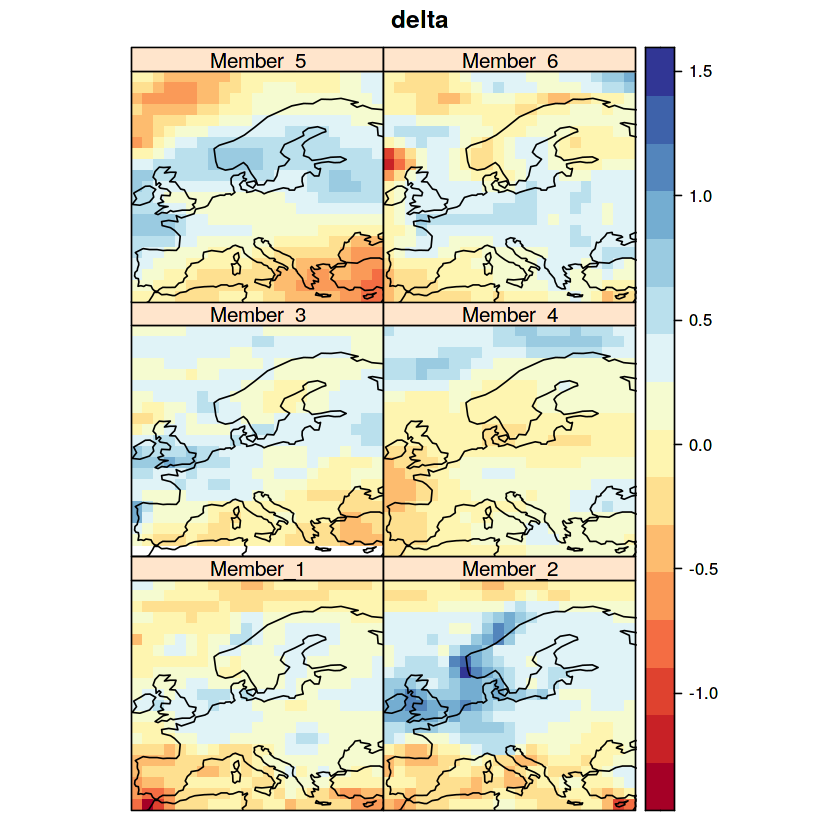

In [48]:
spatialPlot(delta, backdrop.theme = "coastline", main = "delta")

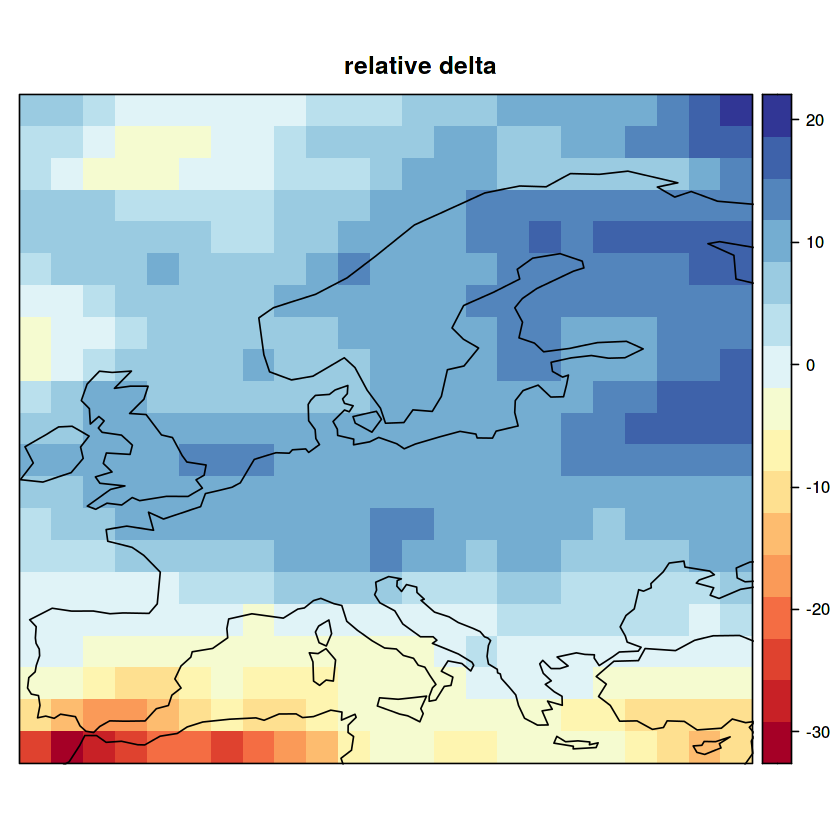

In [49]:
spatialPlot(rel.delta, backdrop.theme = "coastline", main = "relative delta")

Calculate the uncertainty and check visually:

[2021-07-09 10:21:55] - Aggregating members...

[2021-07-09 10:21:55] - Done.



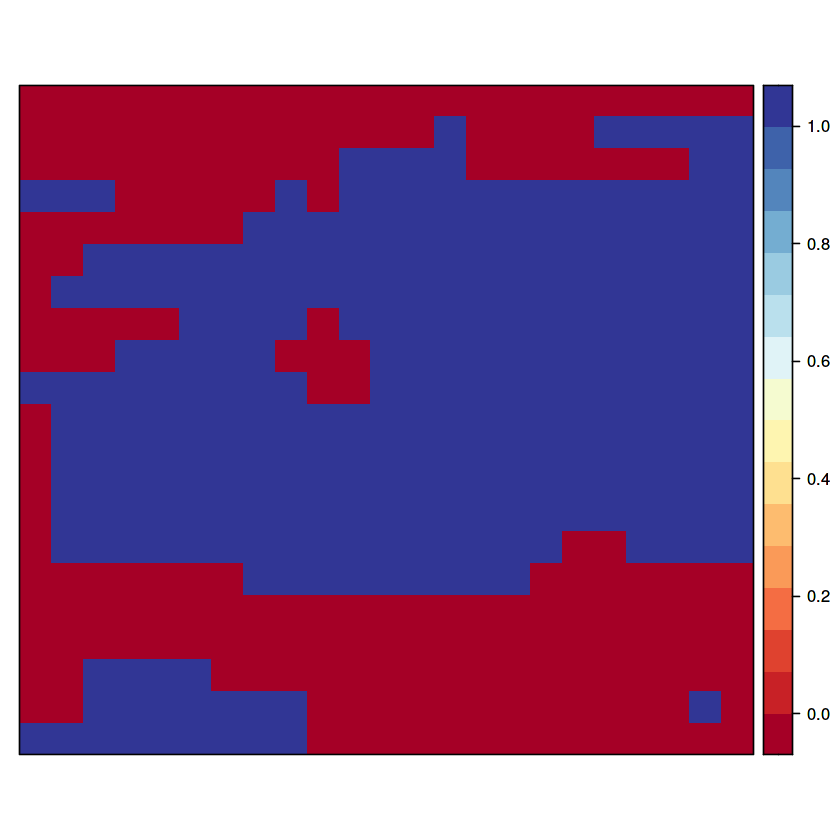

In [50]:
uncer <- aggregateGrid(delta, aggr.mem = list(FUN = agreement, th = 80))
spatialPlot(uncer)

Create the spatial object of the hatches and check visually:

[2021-07-09 10:21:56] - Computing climatology...

[2021-07-09 10:21:56] - Done.



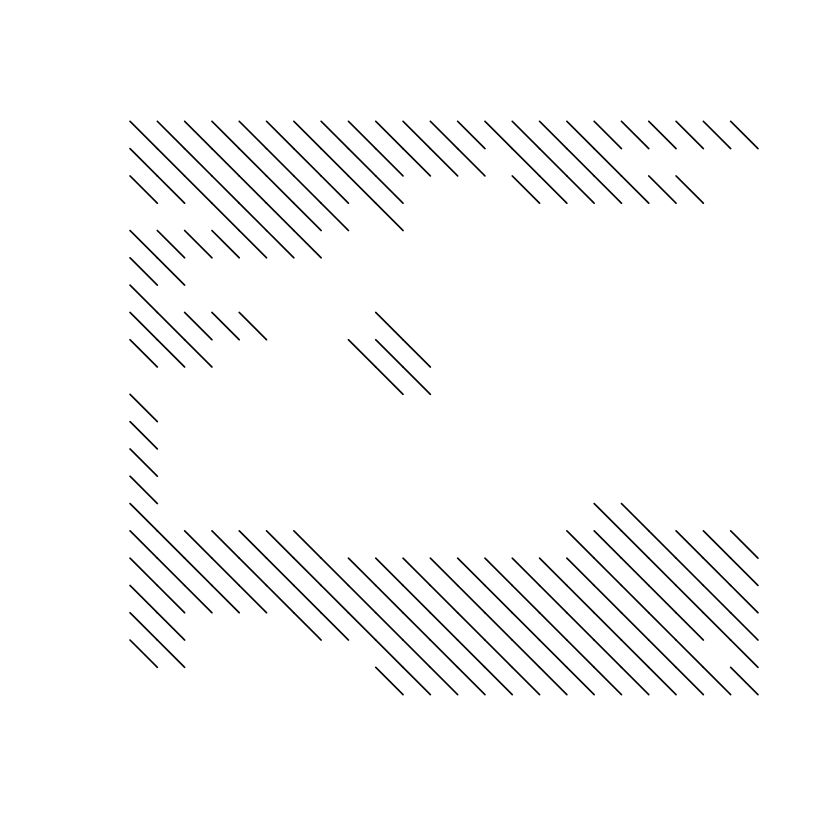

In [51]:
uncer.hatch <- map.hatching(clim = climatology(uncer), threshold = "0.5", angle = "-45",
                             condition = "LT", density = 1,  lwd = 0.6,
                             upscaling.aggr.fun = list(FUN = mean))
plot(uncer.hatch[[2]])

### 4. Generate map figure

Select what to plot in the final figure:

In [52]:
#  Use the relative delta...
out <- rel.delta
# ... or calculate the ensemble mean of the absolute delta by uncommenting the following line
# out <- aggregateGrid(delta, aggr.mem = list(FUN = mean))

Produce the final figure (the hatches are passed to argument `sp.layout`:

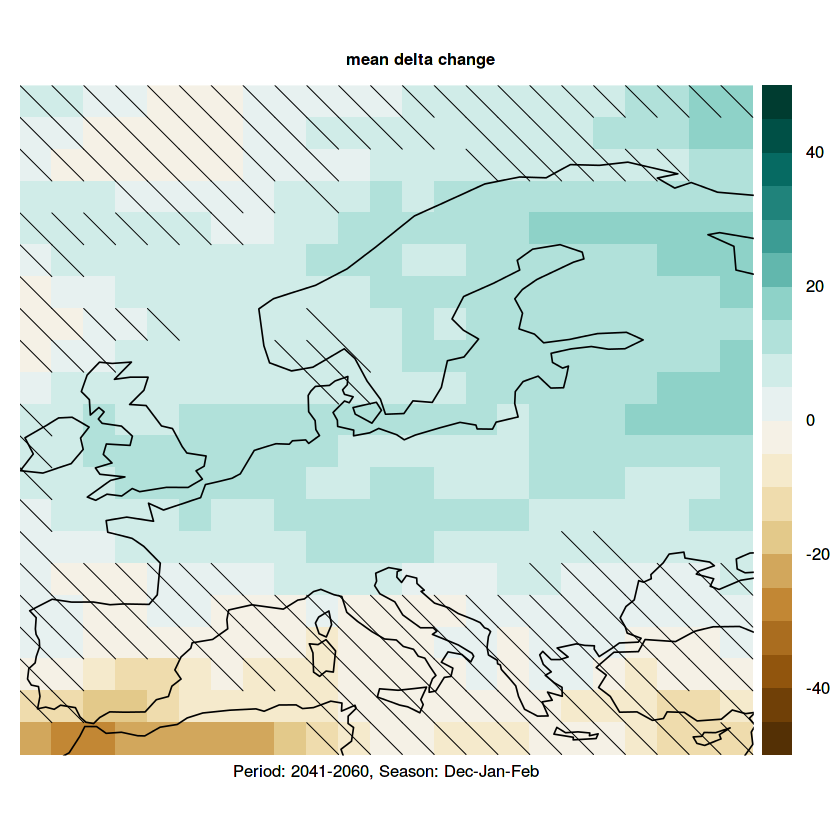

In [53]:
pl <- spatialPlot(out, 
            color.theme = ct, 
            rev.colors = revc, 
            at = seq(n, m, s), 
            set.max = m, set.min = n,
            backdrop.theme = "coastline",
            main = list("mean delta change", cex = 0.8),
            xlab = list(paste0("Period: ", paste(range(future.period), collapse = "-"), ", Season: ", paste(month.abb[season], collapse = "-")), cex = 0.8),
            sp.layout = list(uncer.hatch),
            par.settings = list(axis.line = list(col = 'transparent')))
pl

### 5. Session Information

In [54]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.0
LAPACK: /usr/lib/lapack/liblapack.so.3.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] devtools_2.3.0      usethis_1.6.0       rgdal_1.5-12       
 [4] sp_1.4-2            geoprocessoR_0.2.0  visualizeR_1.6.0   
 [7] transformeR_2.1.1   loadeR_1.7.0        climate4R.UDG_0.2.3
[10] loadeR.java_1.1.1   rJava_0.9-13       

loaded via a namespace (an